# Amplitudes fitting

Importing all necessary stuff:

In [116]:
import numpy as np
from statistics import stdev
from matplotlib import pyplot as plt #this is the traditional method

We now collect the data from the files:

In [117]:
file_name = 'amplitudes.csv'
file_folder = 'data/sample data/'
data_file = file_folder + file_name

frequencies_gen, amplitude_F, amplitude_R, amplitude_L, amplitude_C  = np.loadtxt(data_file, delimiter = ',', skiprows = 1, usecols = (0, 1, 2, 3, 4), unpack = True)


We now define the function we are going to fit the data with: $$ V_R = \frac{R_rV_0}{\sqrt{R^2+{ \left(\omega L - \frac{1}{\omega C}\right)}^2}}$$
$$ V_L = \frac{\omega L V_0}{\sqrt{R^2+{ \left(\omega L - \frac{1}{\omega C}\right)}^2}}$$
$$ V_C = \frac{\frac{V_0}{\omega C}}{\sqrt{R^2+{ \left(\omega L - \frac{1}{\omega C}\right)}^2}}$$

 $\omega = 2 \pi f$ with $f$ being the sinusoidal generator frequency. We've chosen to estimate the uncertainty associated to the amplitude measures with the sample standard deviation $\sigma$ since how the DAQ program outputs the amplitude values is not known.


In [118]:
def R_amp_model(f, R_r , R, L, C, V_0):
    num = R_r * V_0
    den = np.sqrt( R**2 + (2*np.pi*f * L - 1/(2*np.pi*f * C))**2)
    return num / den
def L_amp_model(f, R, L, C, V_0):
    num = 2*np.pi*f * L * V_0
    den = np.sqrt( R**2 + (2*np.pi*f * L - 1/(2*np.pi*f * C))**2)
    return num / den
def C_amp_model(f, R, L, C, V_0):
    num = V_0 / (2*np.pi*f * C)
    den = np.sqrt( R**2 + (2*np.pi*f * L - 1/(2*np.pi*f * C))**2)
    return num / den

We now have to make our initial guess of the fitting parameters

In [119]:
#initial guesses
R_r = 997.8
R = 1174.2
L = 0.0472
C = 1.47e-9
V_0 = 0.5
initial_guess_R = np.array([R_r , R, L, C, V_0])
initial_guess_L = np.array([R, L, C, V_0])
initial_guess_C = np.array([R, L, C, V_0])
# initial_error = np.array([delta_V0, delta_theta, delta_V1])
old_fit_R = np.copy(initial_guess_R)  # save a copy to compare new with old
old_fit_L = np.copy(initial_guess_L)  # save a copy to compare new with old
old_fit_C = np.copy(initial_guess_C)  # save a copy to compare new with old

# estimated_error = photodiode_error(theta, delta_V0, delta_theta, delta_V1,
#                                    V0, theta0)    #propagate uncertainty using initial values

We now compute $\sigma$

In [ ]:
from statistics import stdev

amplitude_stdev = stdev(amplitude_F,)

amplitude_stdev = np.loadtxt(data_file, delimiter = ',', skiprows = 1, usecols = (10), unpack = True)

amplitude_stdev

### Curve fit routine
We are now going to use curve_fit function from scipy

In [121]:
# load curve_fit routine from scipy
from scipy.optimize import curve_fit # import method used here

# the method returns two arrays: one with the resulting fit parameters and then the covariance matrix
fit_R, covariance_R = curve_fit(R_amp_model, frequencies_gen, amplitude_R, p0 = initial_guess_R,sigma=amplitude_stdev,absolute_sigma=True)
fit_L, covariance_L = curve_fit(L_amp_model, frequencies_gen, amplitude_L, p0 = initial_guess_L,sigma=amplitude_stdev,absolute_sigma=True)
fit_C, covariance_C = curve_fit(C_amp_model, frequencies_gen, amplitude_C, p0 = initial_guess_C,sigma=amplitude_stdev,absolute_sigma=True)

#the elements on the the diagonal represent the errors on the fit parameters
error_R = np.sqrt(np.diag(covariance_R))
error_L = np.sqrt(np.diag(covariance_L))
error_C = np.sqrt(np.diag(covariance_C))

print('R\n')
print(old_fit_R)
print(fit_R)
print('L\n')
print(old_fit_L)
print(fit_L)
print('C\n')
print(old_fit_C)
print(fit_C)

#setting the current fit results as old
old_fit_R = np.copy(fit_R)
old_fit_L = np.copy(fit_L)
old_fit_C = np.copy(fit_C)

R

[9.9780e+02 1.1742e+03 4.7200e-02 1.4700e-09 5.0000e-01]
[1.03336832e+03 2.32971776e+03 4.98631951e-02 1.35093044e-09
 5.12048913e-01]
L

[1.1742e+03 4.7200e-02 1.4700e-09 5.0000e-01]
[3.20317793e+03 6.39187334e-02 1.02278317e-09 4.92011405e-01]
C

[1.1742e+03 4.7200e-02 1.4700e-09 5.0000e-01]
[3.02847690e+03 6.04069934e-02 1.08733507e-09 4.89509088e-01]


/var/folders/wx/z_3n9gy53dzd_bsxjtdg_t4h0000gn/T/ipykernel_3820/2031914072.py:10: RuntimeWarning: invalid value encountered in sqrt
  error_R = np.sqrt(np.diag(covariance_R))


Now printing out the first fit results

In [126]:
print()
print('R_r    = ','{:.3f}'.format(fit_R[0]), '±', '{:.5f}'.format(error_R[0]), ' $\Omega$')
print('R    = ','{:.3f}'.format(fit_R[1]), '±', '{:.6f}'.format(error_R[1]), ' $\Omega$')
print('L    = ','{:.5f}'.format(fit_R[2]), '±', '{:.3f}'.format(error_R[2]), ' Henry')
print('C    = ','{:.12f}'.format(fit_R[3]), '±', '{:.12f}'.format(error_R[3]), ' F')
print('V_0    = ','{:.3f}'.format(fit_R[4]), '±', '{:.3f}'.format(error_R[4]), ' V')

print()
print('R    = ','{:.3f}'.format(fit_L[0]), '±', '{:.3f}'.format(error_L[0]), ' $\Omega$')
print('L    = ','{:.5f}'.format(fit_L[1]), '±', '{:.3f}'.format(error_L[1]), ' Henry')
print('C    = ','{:.12f}'.format(fit_L[2]), '±', '{:.12f}'.format(error_L[2]), ' F')
print('V_0    = ','{:.3f}'.format(fit_L[3]), '±', '{:.3f}'.format(error_L[3]), ' V')

print()
print('R    = ','{:.3f}'.format(fit_C[0]), '±', '{:.3f}'.format(error_C[0]), ' $\Omega$')
print('L    = ','{:.5f}'.format(fit_C[1]), '±', '{:.3f}'.format(error_C[1]), ' Henry')
print('C    = ','{:.12f}'.format(fit_C[2]), '±', '{:.12f}'.format(error_C[2]), ' F')
print('V_0    = ','{:.3f}'.format(fit_C[3]), '±', '{:.3f}'.format(error_C[3]), ' V')


R_r    =  1033.368 ± nan  $\Omega$
R    =  2329.718 ± nan  $\Omega$
L    =  0.04986 ± 0.000  Henry
C    =  0.000000001351 ± 0.000000000002  F
V_0    =  0.512 ± 57981.914  V

R    =  -5374049.588 ± 653777767677.791  $\Omega$
L    =  -111.31263 ± 13541713.070  Henry
C    =  -0.000000888060 ± 0.163945239060  F
V_0    =  -0.108 ± 0.000  V

R    =  -3454857.996 ± 8974240003662.031  $\Omega$
L    =  0.00004 ± 9641.266  Henry
C    =  -0.000000108181 ± 0.282204816908  F
V_0    =  -42.704 ± 131131.563  V


We now iterate the process to find new fitting parameters until the values(amplitudes) become stable

In [123]:
new_initial_values_R = np.array([fit_R[0], fit_R[1], fit_R[2],fit_R[3],fit_R[4]])
new_initial_values_L = np.array([fit_L[0], fit_L[1], fit_L[2],fit_L[3]])
new_initial_values_C = np.array([fit_C[0], fit_C[1], fit_C[2],fit_C[3]])

# estimated_error = photodiode_error(theta, delta_V0, delta_theta, delta_V1,
#                                    fit_R[0], fit_R[1]) # propagate error using new values for V0, etc

fit_R, covariance_R = curve_fit(R_amp_model, frequencies_gen, amplitude_R, p0 = new_initial_values_R,sigma=amplitude_stdev,absolute_sigma=True)
fit_L, covariance_L = curve_fit(L_amp_model, frequencies_gen, amplitude_R, p0 = new_initial_values_L,sigma=amplitude_stdev,absolute_sigma=True)
fit_C, covariance_C = curve_fit(C_amp_model, frequencies_gen, amplitude_R, p0 = new_initial_values_C,sigma=amplitude_stdev,absolute_sigma=True)

error_R = np.sqrt(np.diag(covariance_R))
error_L = np.sqrt(np.diag(covariance_L))
error_C = np.sqrt(np.diag(covariance_C))

print('R\n')
print(old_fit_R)
print(fit_R)
print('L\n')
print(old_fit_L)
print(fit_L)
print('C\n')
print(old_fit_C)
print(fit_C)

old_fit_R = np.copy(fit_R)
old_fit_L = np.copy(fit_L)
old_fit_C = np.copy(fit_C)


R

[1.03336832e+03 2.32971776e+03 4.98631951e-02 1.35093044e-09
 5.12048913e-01]
[1.03336832e+03 2.32971776e+03 4.98631951e-02 1.35093044e-09
 5.12048913e-01]
L

[3.20317793e+03 6.39187334e-02 1.02278317e-09 4.92011405e-01]
[-5.37404959e+06 -1.11312629e+02 -8.88060318e-07 -1.07990768e-01]
C

[3.02847690e+03 6.04069934e-02 1.08733507e-09 4.89509088e-01]
[-3.45485800e+06  3.66346878e-05 -1.08180626e-07 -4.27036945e+01]


/var/folders/wx/z_3n9gy53dzd_bsxjtdg_t4h0000gn/T/ipykernel_3820/3680401281.py:12: RuntimeWarning: invalid value encountered in sqrt
  error_R = np.sqrt(np.diag(covariance_R))


### Fit accuracy
Ok now that we've found the best-fit parameters we are interested in the

In [127]:

from scipy.stats import chi2

V_R_model = R_amp_model(frequencies_gen, fit_R[0], fit_R[1], fit_R[2], fit_R[3],fit_R[4])
residual_R = amplitude_R - V_R_model
V_L_model = L_amp_model(frequencies_gen, fit_L[0], fit_L[1], fit_L[2], fit_L[3])
residual_L = amplitude_L - V_L_model
V_C_model = C_amp_model(frequencies_gen, fit_C[0], fit_C[1], fit_C[2], fit_C[3])
residual_C = amplitude_C - V_C_model

# data_uncertainty = photodiode_error(theta, delta_V0, delta_theta, delta_V1, fit_R[0], fit_R[1])

# in our case the uncertainty is estimated to be sigma
data_uncertainty = amplitude_stdev

chisq_R = sum((residual_R/ data_uncertainty)**2) #typo corrected
degrees_of_freedom_R = len(residual_R) - len(initial_guess_R)
reduced_chisq_R = chisq_R / degrees_of_freedom_R  # this should be close to one
CDF_R = chi2.cdf(chisq_R, degrees_of_freedom_R)   # this should be close to 50 percent

chisq_L = sum((residual_L/ data_uncertainty)**2) #typo corrected
degrees_of_freedom_L = len(residual_L) - len(initial_guess_L)
reduced_chisq_L = chisq_L / degrees_of_freedom_L  # this should be close to one
CDF_L = chi2.cdf(chisq_L, degrees_of_freedom_L)   # this should be close to 50 percent

chisq_C = sum((residual_C/ data_uncertainty)**2) #typo corrected
degrees_of_freedom_C = len(residual_C) - len(initial_guess_C)
reduced_chisq_C = chisq_C / degrees_of_freedom_C  # this should be close to one
CDF_C = chi2.cdf(chisq_C, degrees_of_freedom_C)   # this should be close to 50 percent

print('chi-square         = ',chisq_R)
print('degrees of freedom = ',degrees_of_freedom_R)
print('reduced chi-square = ',reduced_chisq_R)
print('fractional probability of chisq ≤', chisq_R, 'for ', degrees_of_freedom_R, 'dof is', CDF_R)

print('chi-square         = ',chisq_L)
print('degrees of freedom = ',degrees_of_freedom_L)
print('reduced chi-square = ',reduced_chisq_L)
print('fractional probability of chisq ≤', chisq_L, 'for ', degrees_of_freedom_L, 'dof is', CDF_L)

print('chi-square         = ',chisq_C)
print('degrees of freedom = ',degrees_of_freedom_C)
print('reduced chi-square = ',reduced_chisq_C)
print('fractional probability of chisq ≤', chisq_C, 'for ', degrees_of_freedom_C, 'dof is', CDF_C)

chi-square         =  849.8104297919764
degrees of freedom =  797
reduced chi-square =  1.0662615179322164
fractional probability of chisq ≤ 849.8104297919764 for  797 dof is 0.9051075947689119
chi-square         =  24125973.098336305
degrees of freedom =  798
reduced chi-square =  30233.048995408903
fractional probability of chisq ≤ 24125973.098336305 for  798 dof is 1.0
chi-square         =  25183153.40343927
degrees of freedom =  798
reduced chi-square =  31557.83634516199
fractional probability of chisq ≤ 25183153.40343927 for  798 dof is 1.0


Now importing [matplotlib](https://matplotlib.org) used for graphical output

ValueError: 'yerr' (shape: (802,)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'y' (shape: (50,))

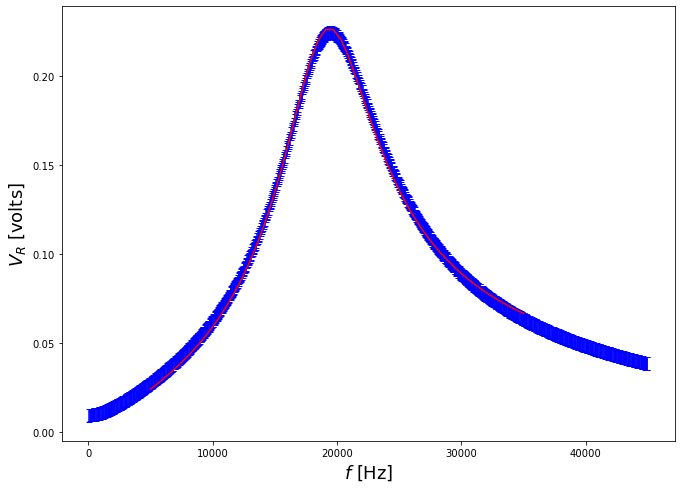

In [128]:
%matplotlib inline

plt.figure(figsize = (11,8))                  #specify figure size as 7 x 5 inches
#for default size, type plt.figure()

plt.xlabel(r"$f$ [Hz]", fontsize = 18) #label axis (using LaTeX commands)
plt.ylabel(r"$V_R$ [volts]", fontsize = 18)   #use 18 point font for label text

# plot the data as before in blue
plt.errorbar(frequencies_gen, amplitude_R,
             xerr=None, yerr=amplitude_stdev,
             linestyle = 'none',
             color = 'blue',
             capsize = 3, capthick = 1, label = "data")

#create curve showing fit to data
freq_fit = np.linspace(5000, 35000, 50)
VR_fit = R_amp_model(freq_fit, fit_R[0], fit_R[1], fit_R[2],fit_R[3],fit_R[4])

#plot the curve fit in red
plt.errorbar(freq_fit, VR_fit, xerr = None, yerr = amplitude_stdev, color = 'red', label = 'fit' )
plt.xlim(4900 , 36000)
plt.ylim(0.0,0.25)
# plt.xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360],
#            ('0', '', '', 90,  '',  '', 180,  '',  '', 270,  '',  '', 360))
plt.legend(loc = 'best')

plt.savefig('Resistor-amplitude.pdf')
plt.show()
